In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [66]:
df = pd.read_csv("C:\\AIdata\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
'''
| Pregnancies | 임신 횟수 | 
| Glucose | 혈당 수치 | 
| BloodPressure | 혈압 | 
| SkinThickness | 피부 두께 | 
| Insulin | 인슐린 수치 | 
| BMI | 체질량 지수 (BMI) | 
| DiabetesPedigreeFunction | 당뇨 유전력 함수 | 
| Age | 나이 | 
| Outcome | 결과 (당뇨 여부) | 
'''

'\n| Pregnancies | 임신 횟수 | \n| Glucose | 혈당 수치 | \n| BloodPressure | 혈압 | \n| SkinThickness | 피부 두께 | \n| Insulin | 인슐린 수치 | \n| BMI | 체질량 지수 (BMI) | \n| DiabetesPedigreeFunction | 당뇨 유전력 함수 | \n| Age | 나이 | \n| Outcome | 결과 (당뇨 여부) | \n'

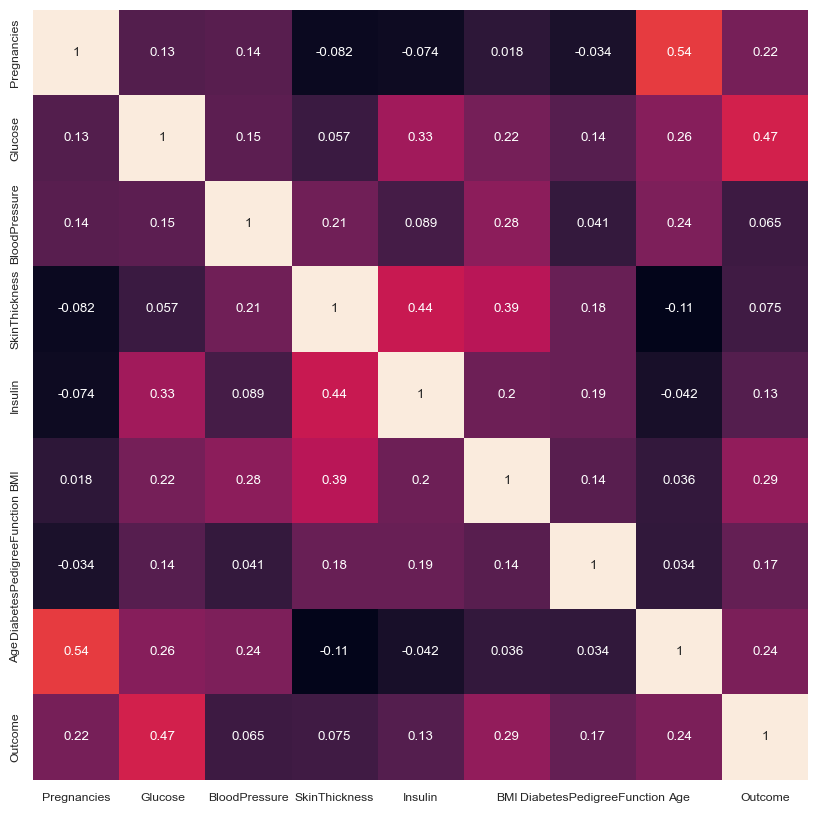

In [68]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [69]:
#SkinThickness가 가장 높음

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [72]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split 
#함수를 가져와, 데이터를 훈련 세트와 테스트 세트로 나눔

X_train, X_test, y_train, y_test=train_test_split(
    X, # X는 독립 변수(특징 데이터), y는 종속 변수(타깃 값)
    y,
    test_size=0.2, # **test_size=0.2**는 데이터의 20%를 테스트 세트로, 80%를 훈련 세트로 사용하겠다는 의미
    shuffle=True, # 데이터를 무작위로 섞어 훈련 및 테스트 세트에 배치하는 옵션
    random_state=12
    )
    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [74]:
from sklearn.linear_model import LinearRegression #  선형 회귀 모델
from sklearn.metrics import mean_squared_error # 평균제곱오차(MSE)

In [75]:
model = LinearRegression() #객체 저장
model.fit(X_train, y_train) # 훈련 데이터를 이용해 선형 회귀 모델을 훈련(fit)
ly_preds = model.predict(X_test) #훈련된 모델을 사용해 테스트 세트인 X_test의 예측값을 구해 ly_preds에 저장

In [76]:
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.1639274377422445


In [77]:
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

In [78]:
print('평균제곱근오차', mse_np(ly_preds, y_test))

평균제곱근오차 0.1639274377422445


In [79]:
def mse(actual, predicted): # 파이썬 기본 기능을 사용해 MSE를 계산하는 함수를 정의
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted)) #실제값과 예측값의 차이를 제곱한 값을 모두 더함
    mean_square_error = sum_square_error / len(actual) #그 값을 데이터 포인트 수로 나누어 평균을 계산
    return mean_square_error  

In [80]:
print('평균제곱근오차', mse(ly_preds, y_test)) #함수를 호출해 파이썬 코드로 MSE를 계산하고 출력

평균제곱근오차 0.1639274377422445


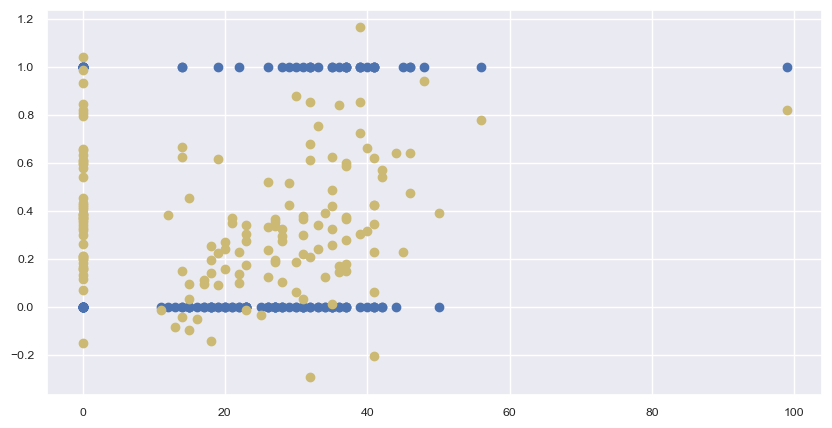

In [81]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') #(피부 두께) 데이터를 x축으로 설정하고, **y_test**를 y축으로 설정
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds') #선형 회귀 모델이 예측한 값(ly_preds)**을 산점도
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [82]:
from sklearn.tree import DecisionTreeRegressor #결정 트리 회귀 모델

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test) #테스트 세트(X_test)**의 예측값을 구하여 **dy_preds**에 저장
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))
# 실제값(y_test)**과 예측값(dy_preds) 사이의 **평균제곱오차(MSE)**를 계산

평균제곱근오차 0.22727272727272727


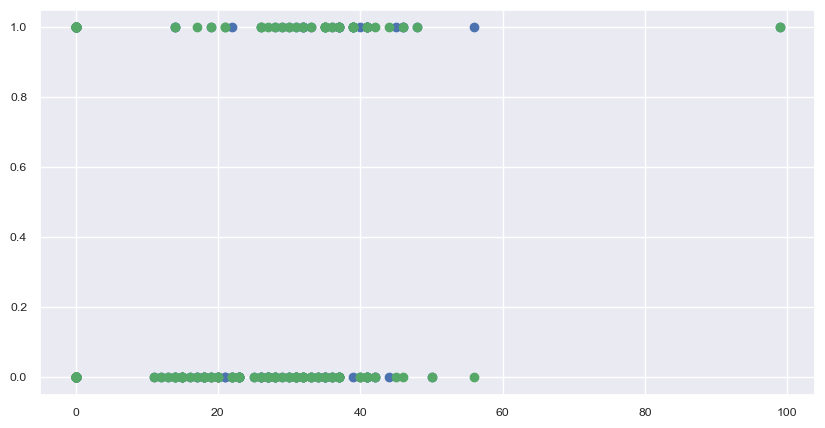

In [83]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [84]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.15252142857142856


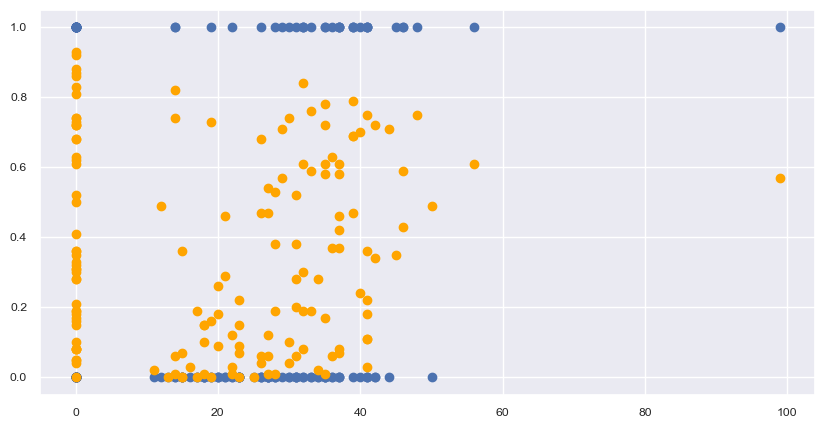

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show() 

In [86]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.17692153394282156


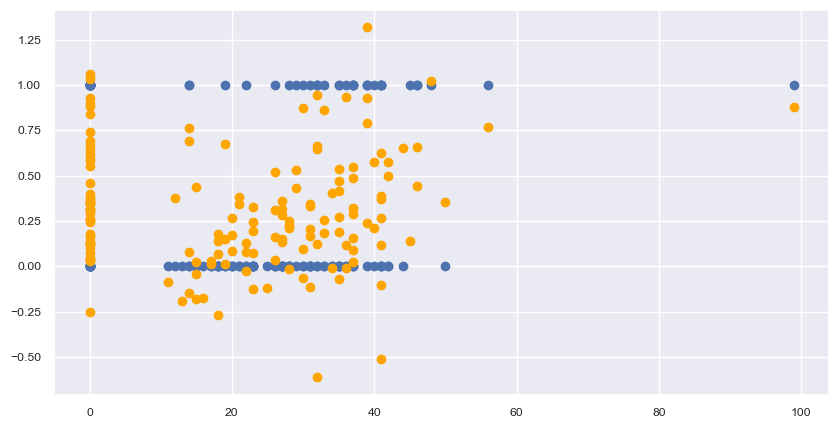

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# 훈련 데이터에 대한 성능
train_preds = model.predict(X_train)
train_mse = mean_squared_error(train_preds, y_train)
train_r2 = r2_score(train_preds, y_train)
    
# 테스트 데이터에 대한 성능
test_mse = mean_squared_error(dy_preds, y_test)  # 이미 예측된 값 사용
test_r2 = r2_score(dy_preds, y_test)

print('훈련 데이터 MSE:', train_mse)
print('훈련 데이터 R²:', train_r2)
print('테스트 데이터 MSE:', test_mse)
print('테스트 데이터 R²:', test_r2)

훈련 데이터 MSE: 0.16397819721484927
훈련 데이터 R²: -0.6296753231013901
테스트 데이터 MSE: 0.22727272727272727
테스트 데이터 R²: 0.0018518518518519933


C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from fon

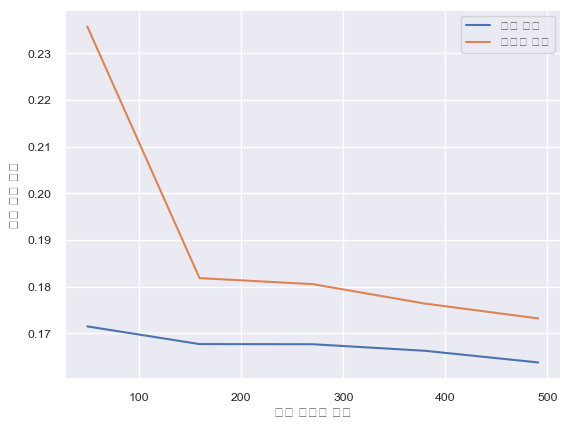

In [89]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="훈련 점수")
plt.plot(train_sizes, test_scores_mean, label="테스트 점수")
plt.legend()
plt.xlabel("훈련 데이터 크기")
plt.ylabel("평균 제곱 오차")
plt.show()

In [90]:
from sklearn.model_selection import cross_val_score

# 교차 검증 수행 (MSE를 음수로 반환하므로 - 부호를 붙여 양수로 변환)
cross_val_mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("교차 검증 MSE:", cross_val_mse.mean())

교차 검증 MSE: 0.17304441005200788
